In [1]:
import imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("pca_data.csv")

In [3]:
data.head()

,Unnamed: 0,pca1,pca2,pca3,Attr5,Attr6,Attr9,Attr15,Attr17,Attr18,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,0,-0.736027,-0.348747,-0.058040,-0.007032,-0.004030,-0.055249,0.032470,-0.029024,-0.129252,...,-0.051149,-0.045553,-0.058091,-0.031549,-0.016588,-0.046548,-0.024825,-0.067129,-0.088498,0
1,1,-1.346851,3.477502,-0.117813,-0.007454,-0.235543,-0.051780,-0.036294,0.006887,1.031123,...,-0.066955,0.005472,-0.113787,0.099133,-0.028335,-0.048775,0.012525,-0.033076,-0.090512,0
2,2,-0.179147,-2.537603,-0.033529,-0.007016,0.001522,-0.024981,-0.041462,-0.033089,-0.759637,...,-0.066955,-0.042601,-0.111453,-0.187408,-0.022549,-0.049574,-0.026057,-0.097240,-0.081367,0
3,3,-1.168294,0.404212,-0.067943,0.000447,0.053798,-0.051257,-0.032966,-0.021344,0.122720,...,-0.041480,-0.020404,2.419677,0.003994,-0.028335,-0.048031,-0.017621,0.005353,-0.070075,0
4,4,-0.821225,1.156009,-0.089037,-0.012538,0.129818,-0.072841,-0.032875,-0.027827,0.322233,...,-0.027693,-0.043371,-0.113987,0.036589,-0.020736,-0.048348,-0.021583,-0.065824,-0.087455,0


In [4]:
data.drop(data.columns[0], axis = 1, inplace = True)

In [5]:
data.shape

(6835, 28)

In [6]:
data.head()

,pca1,pca2,pca3,Attr5,Attr6,Attr9,Attr15,Attr17,Attr18,Attr20,...,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,-0.736027,-0.348747,-0.058040,-0.007032,-0.004030,-0.055249,0.032470,-0.029024,-0.129252,-0.103675,...,-0.051149,-0.045553,-0.058091,-0.031549,-0.016588,-0.046548,-0.024825,-0.067129,-0.088498,0
1,-1.346851,3.477502,-0.117813,-0.007454,-0.235543,-0.051780,-0.036294,0.006887,1.031123,-0.183374,...,-0.066955,0.005472,-0.113787,0.099133,-0.028335,-0.048775,0.012525,-0.033076,-0.090512,0
2,-0.179147,-2.537603,-0.033529,-0.007016,0.001522,-0.024981,-0.041462,-0.033089,-0.759637,-0.183374,...,-0.066955,-0.042601,-0.111453,-0.187408,-0.022549,-0.049574,-0.026057,-0.097240,-0.081367,0
3,-1.168294,0.404212,-0.067943,0.000447,0.053798,-0.051257,-0.032966,-0.021344,0.122720,-0.061746,...,-0.041480,-0.020404,2.419677,0.003994,-0.028335,-0.048031,-0.017621,0.005353,-0.070075,0
4,-0.821225,1.156009,-0.089037,-0.012538,0.129818,-0.072841,-0.032875,-0.027827,0.322233,-0.046371,...,-0.027693,-0.043371,-0.113987,0.036589,-0.020736,-0.048348,-0.021583,-0.065824,-0.087455,0


In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
oversample = SMOTE()
X,y = oversample.fit_resample(data.iloc[:,:-1], data["class"])

In [9]:
from collections import Counter

In [10]:
counter = Counter(y)
print(counter)

Counter({0: 6476, 1: 6476})


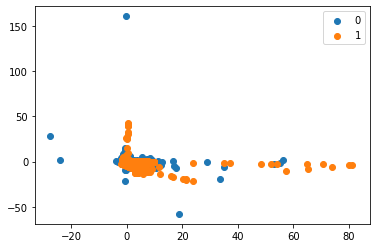

In [11]:
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.loc[row_ix, "pca1"], X.loc[row_ix, "pca2"], label = str(label))
    
plt.legend()
plt.show()

## Combining SMOTE with random undersampling of the majority class

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [13]:
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [("o", over), ("u", under)]
pipeline = Pipeline(steps = steps)

In [14]:
X2, y2 = pipeline.fit_resample(data.iloc[:,:-1], data["class"])

In [15]:
counter2 = Counter(y)
print(counter2)

Counter({0: 6476, 1: 6476})


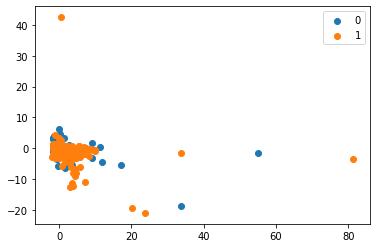

In [16]:
for label, _ in counter2.items():
    row_ix = np.where(y2 == label)[0]
    plt.scatter(X2.iloc[row_ix, 0], X2.iloc[row_ix, 1], label = str(label))
plt.legend()
plt.show()

# Classification
## Decision Tree

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
data_X = data.iloc[:, :-1]
data_y = data["class"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, 
                                                    data_y,
                                                   test_size = 0.3,
                                                   random_state = 24)

In [20]:
model = DecisionTreeClassifier()

In [21]:
re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(model, X_train, Y_train, scoring = "f1_micro", cv = re_stf)

In [22]:
print("Mean CV F1 : %.3f"% np.mean(scores))

Mean CV F1 : 0.919


In [23]:
scores = cross_val_score(model, X_train, Y_train, scoring = "roc_auc", cv = re_stf)

In [24]:
print("Mean CV ROC_AUC : %.3f"% np.mean(scores))

Mean CV ROC_AUC : 0.569


In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [28]:
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

F1 : 0.909
ROC AUC : 0.628


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
forest = RandomForestClassifier(n_estimators=500, random_state=24)

In [32]:
scores = cross_val_score(forest, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(scores))
scores = cross_val_score(forest, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(scores))

Mean CV F1 : 0.952
Mean CV ROC_AUC : 0.796


In [33]:
forest.fit(X_train, Y_train)
pred_y = forest.predict(X_test)
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y))

F1 : 0.933
ROC AUC : 0.510


## SMOTE

## Decision Tree

In [34]:
steps = [("over", SMOTE()), ("model", DecisionTreeClassifier())]
pipeline = Pipeline(steps = steps)

In [35]:
scores2 = cross_val_score(pipeline, X_train, Y_train, scoring = "f1_micro", cv = re_stf)

In [36]:
print("Mean CV F1 : %.3f"% np.mean(scores2))

Mean CV F1 : 0.860


In [37]:
scores2 = cross_val_score(pipeline, X_train, Y_train, scoring = "roc_auc", cv = re_stf)

In [38]:
print("Mean CV ROC_AUC : %.3f"% np.mean(scores2))

Mean CV ROC_AUC : 0.577


In [39]:
pipeline.fit(X_train, Y_train)
pred_y2 = pipeline.predict(X_test)

In [40]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.860
ROC AUC : 0.619


## Random Forest

In [41]:
steps = [("over", SMOTE()), ("model", RandomForestClassifier(n_estimators=500, random_state=24))]
pipeline2 = Pipeline(steps = steps)

In [42]:
scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(scores2))

Mean CV F1 : 0.928


In [43]:
scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(scores2))

Mean CV ROC_AUC : 0.796


In [44]:
pipeline2.fit(X_train, Y_train)
pred_y2 = pipeline2.predict(X_test)

In [45]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.925
ROC AUC : 0.620


## XGBOOST

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb_model = XGBClassifier(learning_rate = 0.1, max_depth = 200, n_estimators = 500, subsample = 1)

In [48]:
smote = SMOTE(random_state = 43)

In [49]:
X_res, y_res = smote.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 35)

In [50]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=200,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
pred_y = xgb_model.predict(X_test)

In [52]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.975
ROC AUC : 0.975


In [53]:
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Bankrupted','Not Bankrupted']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

In [54]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

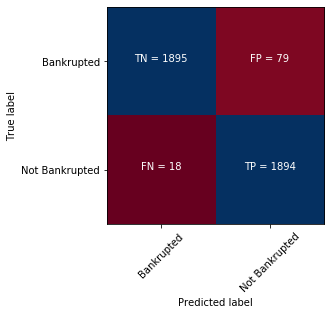

Recall=0.991 
Precision=0.960
F1=0.975
Average precision-recall score: 0.997


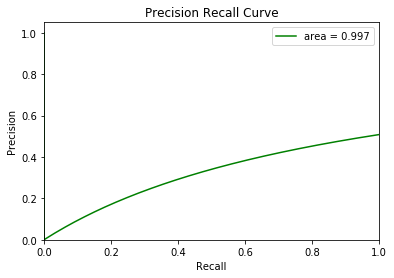

In [55]:
pred_y = xgb_model.predict(X_test)
scores = xgb_model.predict_proba(X_test)[:,1]

plot_cm(xgb_model, pred_y)
plot_aucprc(xgb_model, scores)

In [56]:
check_X = data.iloc[:,:-1]
check_y = data["class"]

In [57]:
cX_train, cX_test, cy_train, cy_test = train_test_split(check_X, check_y, test_size = 0.3, random_state = 35)

In [58]:
cX_test.head()

,pca1,pca2,pca3,Attr5,Attr6,Attr9,Attr15,Attr17,Attr18,Attr20,...,Attr46,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64
2610,0.176474,0.049121,-0.065328,0.018515,-0.042048,-0.092151,0.012917,-0.037034,-0.057543,-0.095907,...,-0.005841,-0.047792,-0.040859,-0.082801,-0.061467,-0.454330,-0.046930,-0.022542,-0.045877,-0.088313
2115,-0.315872,-0.084305,-0.061414,-0.008336,0.001522,0.020396,-0.026610,-0.032136,-0.019801,-0.148365,...,-0.021923,-0.060315,-0.043121,-0.096261,-0.011105,-0.028335,-0.041056,-0.022335,-0.050819,-0.077660
5913,-0.921682,-0.544565,-0.057440,-0.001248,0.001522,0.013386,0.047818,-0.026116,-0.183629,-0.183374,...,-0.013378,-0.066955,-0.021624,-0.110169,-0.038847,-0.028335,-0.050182,-0.024333,0.000762,-0.063093
1331,-1.081593,-0.152986,-0.061896,-0.003700,0.001522,-0.040546,-0.025700,-0.019689,-0.047398,-0.154551,...,-0.014240,-0.061536,-0.039428,-0.075437,-0.018540,-0.028335,-0.038953,-0.023228,-0.015362,-0.083620
6524,-1.436078,0.611344,-0.068721,0.002955,0.001522,-0.013014,-0.034074,-0.012119,0.202410,-0.064633,...,-0.001337,-0.042572,0.036621,-0.005264,0.013212,-0.028335,-0.047963,-0.025136,0.106857,-0.036828


In [59]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
12947    1
12948    1
12949    1
12950    1
12951    1
Name: class, Length: 12952, dtype: int64

In [60]:
check = y_test[y_test.index<=6153][y_test[y_test.index<=6153]==1].head(30)
check

3383    1
3159    1
2545    1
93      1
5377    1
5532    1
2160    1
1975    1
4012    1
1034    1
3185    1
4930    1
4579    1
3720    1
1892    1
3172    1
5430    1
833     1
5650    1
4651    1
524     1
5786    1
3424    1
680     1
1475    1
162     1
5117    1
119     1
2945    1
48      1
Name: class, dtype: int64

In [61]:
data["class"].iloc[check.index]

3383    1
3159    1
2545    1
93      1
5377    1
5532    1
2160    1
1975    1
4012    1
1034    1
3185    1
4930    1
4579    1
3720    1
1892    1
3172    1
5430    1
833     1
5650    1
4651    1
524     1
5786    1
3424    1
680     1
1475    1
162     1
5117    1
119     1
2945    1
48      1
Name: class, dtype: int64

In [62]:
X_resa, y_resa = smote.fit_sample(cX_train, cy_train)

In [63]:
xgb_model.fit(X_resa, y_resa)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=200,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
pred_y = xgb_model.predict(cX_test)

In [65]:
print("F1 : %.3f" % f1_score(cy_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(cy_test, pred_y))

F1 : 0.929
ROC AUC : 0.615


# SMOTE combined with Undersampling
## Decision Tree

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, 
                                                    data_y,
                                                   test_size = 0.3,
                                                   random_state = 24)

re_stf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [67]:
over2 = SMOTE(sampling_strategy = 0.1)
under2 = RandomUnderSampler(sampling_strategy = 0.5)
steps2 = [('over', over2), ('under', under2), ('model', DecisionTreeClassifier())]
pipeline2 = Pipeline(steps = steps2)

In [68]:
f1_scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores2))

Mean CV F1 : 0.791


In [69]:
roc_scores2 = cross_val_score(pipeline2, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores2))

Mean CV ROC_AUC : 0.626


In [70]:
pipeline2.fit(X_train, Y_train)
pred_y2 = pipeline2.predict(X_test)

In [71]:
print("F1 : %.3f" % f1_score(Y_test, pred_y2, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y2))

F1 : 0.776
ROC AUC : 0.634


## Random Forest

In [72]:
steps3 = [('over', over2), ('under', under2), ('model', RandomForestClassifier(n_estimators=500, random_state=24))]
pipeline3 = Pipeline(steps = steps3)

In [73]:
f1_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores3))

Mean CV F1 : 0.894


In [74]:
roc_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores3))

Mean CV ROC_AUC : 0.798


In [75]:
pipeline3.fit(X_train, Y_train)
pred_y3 = pipeline3.predict(X_test)

In [76]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3))

F1 : 0.889
ROC AUC : 0.705


## XGBOOST

In [77]:
steps3 = [('over', over2), ('under', under2), ('model', xgb_model)]
pipeline3 = Pipeline(steps = steps3)

In [78]:
f1_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores3))

Mean CV F1 : 0.898


In [79]:
roc_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores3))

Mean CV ROC_AUC : 0.821


In [80]:
pipeline3.fit(X_train, Y_train)
pred_y3 = pipeline3.predict(X_test)

In [81]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3))

F1 : 0.892
ROC AUC : 0.713


## GRID SEARCH
## Decision Tree

In [82]:
def grid_smote_search(lst, model) :
    
    for k in lst:
        over4 = SMOTE(sampling_strategy = 0.1, k_neighbors = k)
        under4 = RandomUnderSampler(sampling_strategy = 0.5)
        steps4 = [("over", over4), ("under", under4), ("model", model)]
        pipeline4 = Pipeline(steps = steps4)

        print("\n------- k = ", k,"-------")
        f1_scores4 = cross_val_score(pipeline4, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
        print("Mean F1 : %.3f" % (np.mean(f1_scores4)))
        roc_scores4 = cross_val_score(pipeline4, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
        print("Mean ROC AUC : %.3f" % (np.mean(roc_scores4)))

        pipeline4.fit(X_train, Y_train)
        pred_y4 = pipeline4.predict(X_test)
        print("\nF1 : %.3f" % f1_score(Y_test, pred_y4, average = 'micro'))
        print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y4))

In [83]:
k_values = [1,2,3,4,5,6,7,8]

In [84]:
grid_smote_search(k_values, DecisionTreeClassifier())


------- k =  1 -------
Mean F1 : 0.797
Mean ROC AUC : 0.612

F1 : 0.774
ROC AUC : 0.615

------- k =  2 -------
Mean F1 : 0.785
Mean ROC AUC : 0.603

F1 : 0.778
ROC AUC : 0.677

------- k =  3 -------
Mean F1 : 0.800
Mean ROC AUC : 0.611

F1 : 0.797
ROC AUC : 0.652

------- k =  4 -------
Mean F1 : 0.788
Mean ROC AUC : 0.614

F1 : 0.788
ROC AUC : 0.598

------- k =  5 -------
Mean F1 : 0.790
Mean ROC AUC : 0.627

F1 : 0.789
ROC AUC : 0.665

------- k =  6 -------
Mean F1 : 0.796
Mean ROC AUC : 0.617

F1 : 0.792
ROC AUC : 0.642

------- k =  7 -------
Mean F1 : 0.790
Mean ROC AUC : 0.629

F1 : 0.799
ROC AUC : 0.646

------- k =  8 -------
Mean F1 : 0.786
Mean ROC AUC : 0.610

F1 : 0.789
ROC AUC : 0.648


## Random Forest

In [85]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=500))


------- k =  1 -------
Mean F1 : 0.903
Mean ROC AUC : 0.797

F1 : 0.893
ROC AUC : 0.686

------- k =  2 -------
Mean F1 : 0.902
Mean ROC AUC : 0.793

F1 : 0.898
ROC AUC : 0.688

------- k =  3 -------
Mean F1 : 0.897
Mean ROC AUC : 0.789

F1 : 0.889
ROC AUC : 0.701

------- k =  4 -------
Mean F1 : 0.899
Mean ROC AUC : 0.797

F1 : 0.903
ROC AUC : 0.681

------- k =  5 -------
Mean F1 : 0.895
Mean ROC AUC : 0.793

F1 : 0.891
ROC AUC : 0.685

------- k =  6 -------
Mean F1 : 0.895
Mean ROC AUC : 0.800

F1 : 0.889
ROC AUC : 0.677

------- k =  7 -------
Mean F1 : 0.898
Mean ROC AUC : 0.799

F1 : 0.896
ROC AUC : 0.667

------- k =  8 -------
Mean F1 : 0.897
Mean ROC AUC : 0.794

F1 : 0.905
ROC AUC : 0.689


In [86]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=500))


------- k =  1 -------
Mean F1 : 0.902
Mean ROC AUC : 0.791

F1 : 0.886
ROC AUC : 0.682

------- k =  2 -------
Mean F1 : 0.901
Mean ROC AUC : 0.791

F1 : 0.887
ROC AUC : 0.679

------- k =  3 -------
Mean F1 : 0.900
Mean ROC AUC : 0.796

F1 : 0.898
ROC AUC : 0.699

------- k =  4 -------
Mean F1 : 0.897
Mean ROC AUC : 0.792

F1 : 0.885
ROC AUC : 0.678

------- k =  5 -------
Mean F1 : 0.900
Mean ROC AUC : 0.798

F1 : 0.905
ROC AUC : 0.682

------- k =  6 -------
Mean F1 : 0.899
Mean ROC AUC : 0.794

F1 : 0.891
ROC AUC : 0.685

------- k =  7 -------
Mean F1 : 0.899
Mean ROC AUC : 0.792

F1 : 0.897
ROC AUC : 0.653

------- k =  8 -------
Mean F1 : 0.897
Mean ROC AUC : 0.791

F1 : 0.897
ROC AUC : 0.685


In [87]:
grid_smote_search(k_values, RandomForestClassifier(n_estimators=400))


------- k =  1 -------
Mean F1 : 0.904
Mean ROC AUC : 0.798

F1 : 0.890
ROC AUC : 0.681

------- k =  2 -------
Mean F1 : 0.899
Mean ROC AUC : 0.793

F1 : 0.900
ROC AUC : 0.693

------- k =  3 -------
Mean F1 : 0.898
Mean ROC AUC : 0.794

F1 : 0.897
ROC AUC : 0.677

------- k =  4 -------
Mean F1 : 0.899
Mean ROC AUC : 0.794

F1 : 0.896
ROC AUC : 0.715

------- k =  5 -------
Mean F1 : 0.896
Mean ROC AUC : 0.797

F1 : 0.904
ROC AUC : 0.671

------- k =  6 -------
Mean F1 : 0.899
Mean ROC AUC : 0.796

F1 : 0.884
ROC AUC : 0.702

------- k =  7 -------
Mean F1 : 0.898
Mean ROC AUC : 0.792

F1 : 0.888
ROC AUC : 0.690

------- k =  8 -------
Mean F1 : 0.901
Mean ROC AUC : 0.794

F1 : 0.890
ROC AUC : 0.674


## XGBOOST

In [88]:
grid_smote_search(k_values, xgb_model)


------- k =  1 -------
Mean F1 : 0.897
Mean ROC AUC : 0.818

F1 : 0.898
ROC AUC : 0.696

------- k =  2 -------
Mean F1 : 0.900
Mean ROC AUC : 0.809

F1 : 0.893
ROC AUC : 0.700

------- k =  3 -------
Mean F1 : 0.897
Mean ROC AUC : 0.811

F1 : 0.897
ROC AUC : 0.712

------- k =  4 -------
Mean F1 : 0.897
Mean ROC AUC : 0.818

F1 : 0.894
ROC AUC : 0.718

------- k =  5 -------
Mean F1 : 0.897
Mean ROC AUC : 0.816

F1 : 0.886
ROC AUC : 0.721

------- k =  6 -------
Mean F1 : 0.893
Mean ROC AUC : 0.815

F1 : 0.902
ROC AUC : 0.691

------- k =  7 -------
Mean F1 : 0.894
Mean ROC AUC : 0.810

F1 : 0.903
ROC AUC : 0.702

------- k =  8 -------
Mean F1 : 0.898
Mean ROC AUC : 0.812

F1 : 0.893
ROC AUC : 0.696


In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1]
xgb_greedy_model = XGBClassifier()

In [91]:
for n in n_estimators:
    for rate in learning_rate:
        print("\n N_estimators : ", n, " & Learning_rate : ", rate)
        grid_smote_search(k_values, XGBClassifier(n_estimators = n, learning_rate = rate))


 N_estimators :  100  & Learning_rate :  0.001

------- k =  1 -------
Mean F1 : 0.840
Mean ROC AUC : 0.730

F1 : 0.843
ROC AUC : 0.621

------- k =  2 -------
Mean F1 : 0.825
Mean ROC AUC : 0.723

F1 : 0.847
ROC AUC : 0.665

------- k =  3 -------
Mean F1 : 0.832
Mean ROC AUC : 0.725

F1 : 0.769
ROC AUC : 0.689

------- k =  4 -------
Mean F1 : 0.827
Mean ROC AUC : 0.729

F1 : 0.804
ROC AUC : 0.677

------- k =  5 -------
Mean F1 : 0.820
Mean ROC AUC : 0.718

F1 : 0.840
ROC AUC : 0.665

------- k =  6 -------
Mean F1 : 0.825
Mean ROC AUC : 0.714

F1 : 0.781
ROC AUC : 0.675

------- k =  7 -------
Mean F1 : 0.822
Mean ROC AUC : 0.722

F1 : 0.778
ROC AUC : 0.649

------- k =  8 -------
Mean F1 : 0.819
Mean ROC AUC : 0.734

F1 : 0.829
ROC AUC : 0.648

 N_estimators :  100  & Learning_rate :  0.005

------- k =  1 -------
Mean F1 : 0.841
Mean ROC AUC : 0.747

F1 : 0.831
ROC AUC : 0.673

------- k =  2 -------
Mean F1 : 0.833
Mean ROC AUC : 0.749

F1 : 0.816
ROC AUC : 0.659

------- k =  

Mean F1 : 0.830
Mean ROC AUC : 0.738

F1 : 0.852
ROC AUC : 0.612

------- k =  8 -------
Mean F1 : 0.842
Mean ROC AUC : 0.745

F1 : 0.789
ROC AUC : 0.655

 N_estimators :  300  & Learning_rate :  0.005

------- k =  1 -------
Mean F1 : 0.865
Mean ROC AUC : 0.763

F1 : 0.860
ROC AUC : 0.696

------- k =  2 -------
Mean F1 : 0.861
Mean ROC AUC : 0.768

F1 : 0.855
ROC AUC : 0.693

------- k =  3 -------
Mean F1 : 0.860
Mean ROC AUC : 0.771

F1 : 0.834
ROC AUC : 0.686

------- k =  4 -------
Mean F1 : 0.860
Mean ROC AUC : 0.768

F1 : 0.847
ROC AUC : 0.689

------- k =  5 -------
Mean F1 : 0.863
Mean ROC AUC : 0.771

F1 : 0.852
ROC AUC : 0.688

------- k =  6 -------
Mean F1 : 0.859
Mean ROC AUC : 0.772

F1 : 0.860
ROC AUC : 0.651

------- k =  7 -------
Mean F1 : 0.856
Mean ROC AUC : 0.771

F1 : 0.858
ROC AUC : 0.678

------- k =  8 -------
Mean F1 : 0.852
Mean ROC AUC : 0.767

F1 : 0.859
ROC AUC : 0.696

 N_estimators :  300  & Learning_rate :  0.01

------- k =  1 -------
Mean F1 : 0.874


F1 : 0.853
ROC AUC : 0.682

------- k =  6 -------
Mean F1 : 0.869
Mean ROC AUC : 0.777

F1 : 0.850
ROC AUC : 0.680

------- k =  7 -------
Mean F1 : 0.863
Mean ROC AUC : 0.779

F1 : 0.852
ROC AUC : 0.671

------- k =  8 -------
Mean F1 : 0.866
Mean ROC AUC : 0.776

F1 : 0.852
ROC AUC : 0.667

 N_estimators :  500  & Learning_rate :  0.01

------- k =  1 -------
Mean F1 : 0.880
Mean ROC AUC : 0.792

F1 : 0.878
ROC AUC : 0.695

------- k =  2 -------
Mean F1 : 0.876
Mean ROC AUC : 0.793

F1 : 0.849
ROC AUC : 0.694

------- k =  3 -------
Mean F1 : 0.876
Mean ROC AUC : 0.787

F1 : 0.869
ROC AUC : 0.680

------- k =  4 -------
Mean F1 : 0.876
Mean ROC AUC : 0.792

F1 : 0.869
ROC AUC : 0.711

------- k =  5 -------
Mean F1 : 0.873
Mean ROC AUC : 0.797

F1 : 0.879
ROC AUC : 0.682

------- k =  6 -------
Mean F1 : 0.878
Mean ROC AUC : 0.790

F1 : 0.861
ROC AUC : 0.676

------- k =  7 -------
Mean F1 : 0.873
Mean ROC AUC : 0.793

F1 : 0.863
ROC AUC : 0.677

------- k =  8 -------
Mean F1 : 0

In [241]:
new_xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.08)

In [242]:
over2 = SMOTE(sampling_strategy = 0.05, k_neighbors = 2)
under2 = RandomUnderSampler(sampling_strategy = 0.6)
steps3 = [('over', over2), ('under', under2), ('model', new_xgb_model)]
pipeline3 = Pipeline(steps = steps3)

In [243]:
f1_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "f1_micro", cv = re_stf)
print("Mean CV F1 : %.3f"% np.mean(f1_scores3))

Mean CV F1 : 0.817


In [244]:
roc_scores3 = cross_val_score(pipeline3, X_train, Y_train, scoring = "roc_auc", cv = re_stf)
print("Mean CV ROC_AUC : %.3f"% np.mean(roc_scores3))

Mean CV ROC_AUC : 0.805


In [255]:
pipeline3.fit(X_train, Y_train)
pred_y3 = pipeline3.predict(X_test)

In [256]:
print("F1 : %.3f" % f1_score(Y_test, pred_y3, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(Y_test, pred_y3))

F1 : 0.819
ROC AUC : 0.716
